#Import

In [1]:
%load_ext autoreload
%autoreload 2

In [78]:
import matplotlib.pyplot as plt #
from sklearn.tree import plot_tree, export_text#
import seaborn as sns #
import pandas as pd #
import numpy as np #
import matplotlib #
import os
import sys #

from sklearn.neighbors import KNeighborsClassifier #
from sklearn.model_selection import GridSearchCV #
from sklearn.model_selection import RandomizedSearchCV#

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_auc_score #
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc

%matplotlib inline

from google.colab import drive #



In [7]:
sys.path.append('/content/drive/MyDrive/Python/ML/Module')

In [8]:
from process_bank_churn import get_processed_data, preprocess_new_data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


#Format

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#Functions

In [62]:
def train_auc (model, X_train, X_val, train_targets, val_targets):
    # –ù–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
    model.fit(X_train, train_targets)

    y_train_prob = model.predict_proba(X_train)[:, 1]

    train_auc = roc_auc_score(train_targets, y_train_prob)

    return train_auc

def val_auc (model, X_train, X_val, train_targets, val_targets):

    # –ù–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
    model.fit(X_train, train_targets)

    y_val_prob = model.predict_proba(X_val)[:, 1]

    val_auc = roc_auc_score(val_targets, y_val_prob)

    return val_auc

def count_auroc(model, X_train, X_val, train_targets, val_targets):
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_val_prob = model.predict_proba(X_val)[:, 1]

    train_auc = roc_auc_score(train_targets, y_train_prob)
    val_auc = roc_auc_score(val_targets, y_val_prob)
    print(f'Train AUC: {train_auc:.4f}')
    print(f'Validation AUC: {val_auc:.4f}')

    return  train_auc, val_auc


def max_leaf_node_error(ln, X_train, X_val, train_targets, val_targets):
    model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=ln, random_state=42)
    model.fit(X_train, train_targets)
    train_auc, val_auc = count_auroc(model, X_train, X_val, train_targets, val_targets)
    return {'Maxmax_leaf_nodes': ln, 'Training AUROC': train_auc, 'Validation AUROC': val_auc}



#–ó–∞–≤–¥–∞–Ω–Ω—è

–í —Ü—å–æ–º—É –¥–æ–º–∞—à–Ω—å–æ–º—É –∑–∞–≤–¥–∞–Ω–Ω—ñ –º–∏ –∑–Ω–æ–≤—É –ø—Ä–∞—Ü—é—î–º–æ –∑ –¥–∞–Ω–∏–º–∏ –∑ –Ω–∞—à–æ–≥–æ –∑–º–∞–≥–∞–Ω–Ω—è ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

–¢—É—Ç –º–∏ –ø–æ–±—É–¥—É—î–º–æ —Ä—ñ—à–µ–Ω–Ω—è –∑–∞–¥–∞—á—ñ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º kNearestNeighboors, –∑–Ω–∞–π–¥–µ–º–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ñ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è —Ü—å–æ–≥–æ –º–µ—Ç–æ–¥—É —ñ –∑—Ä–æ–±–∏–º–æ –±–∞–∑–æ–≤—ñ –∞–Ω—Å–∞–º–±–ª—ñ. –¶–µ –¥–∞—Å—Ç—å –∑–º–æ–≥—É –ø–æ—Ä—ñ–≤–Ω—è—Ç–∏ –ø–µ—Ä—Ñ–æ—Ä–º–∞–Ω—Å –º–æ–¥–µ–ª—ñ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º–∏ –≤–∏–≤—á–µ–Ω–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏.

##–ó–∞–≤–¥–∞–Ω–Ω—è 0

0. –ó—á–∏—Ç–∞–π—Ç–µ –¥–∞–Ω—ñ `train.csv` —Ç–∞ –∑—Ä–æ–±—ñ—Ç—å –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å–∏–Ω–≥ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ –Ω–∞–ø–∏—Å–∞–Ω–∏–π –í–∞–º–∏ —Å–∫—Ä–∏–ø—Ç `process_bank_churn.py` —Ç–∞–∫, –∞–±–∏ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ –æ—Ç—Ä–∏–º–∞—Ç–∏ –¥–∞–Ω—ñ –≤ —Ä–æ–∑–±–∏—Ç—Ç—ñ X_train, train_targets, X_val, val_targets –¥–ª—è –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤.

  –Ø–∫—â–æ –í–∞–º –Ω–µ –≤–¥–∞–ª–æ—Å—å —Ä–µ–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ `2.3. –î–µ—Ä–µ–≤–∞ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å` —Å–∫—Ä–∏–ø—Ç `process_bank_churn.py` - –º–æ–∂–Ω–∞ —Å–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏—Å—å –≥–æ—Ç–æ–≤–∏–º —Å–∫—Ä–∏–ø—Ç–æ–º –∑ –∑–∞–ø—Ä–æ–ø–æ–Ω–æ–≤–∞–Ω–æ–≥–æ —Ä—ñ—à–µ–Ω–Ω—è —Ç–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è.

In [6]:
#–∑—á–∏—Ç—É–≤–∞–Ω–Ω—è –¥–∞–Ω–∏—Ö
raw_df = pd.read_csv('//content/drive/MyDrive/Python/ML/DATA/Kaggle/Bank/train.csv.zip')

In [9]:
#–ø—Ä–µ–ø—Ä–æ—Ü–µ—Å–∏–Ω–≥ –¥–∞–Ω–∏—Ö
X_train, X_val, train_targets, val_targets, model_cols, scaler, encoder, numeric_cols, encoded_cols, categorical_cols = get_processed_data(raw_df)

##–ó–∞–≤–¥–∞–Ω–Ω—è 1

1. –ù–∞–≤—á—ñ—Ç—å –Ω–∞ —Ü–∏—Ö –¥–∞–Ω–∏—Ö –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä kNN –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º —ñ –≤–∏–º—ñ—Ä—è–π—Ç–µ —Ç–æ—á–Ω—ñ—Å—Ç—å –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä–∞—Ö. –ó—Ä–æ–±—ñ—Ç—å –∑–∞–∫–ª—é—á–µ–Ω–Ω—è –ø—Ä–æ –æ—Ç—Ä–∏–º–∞–Ω—É –º–æ–¥–µ–ª—å: –≤–æ–Ω–∞ —Ö–æ—Ä–æ—à–∞/–ø–æ–≥–∞–Ω–∞, —á–∏ —î high bias/high variance?

In [50]:
#–Ω–∞–≤—á–∞–Ω–Ω—è kNN –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º
knn = KNeighborsClassifier()

knn.fit(X_train, train_targets)

KNeighborsClassifier()

In [11]:
#—Ç–æ—á–Ω—ñ—Å—Ç—å Knn –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä–∞—Ö
count_auroc(knn, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9545
Validation AUC: 0.8662


(0.9545101727305118, 0.8661784072981686)

**–í–∏—Å–Ω–æ–≤–∫–∏:**
- –ú–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–∞, –±–æ –≤–∏—Å–æ–∫–µ –∑–Ω–∞—á–µ–Ω–Ω—è AUROC —è–∫ –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞–∫ —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ
- –í —Ç–æ–π –∂–µ —á–∞—Å –º–æ–¥–µ–ª—å —î –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–æ—é, –±–æ –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–≤–±–æ—Ä—ñ AUROC –Ω–∞ –±–∞–≥–∞—Ç–æ –Ω–∏–∂—á–µ –Ω—ñ–∂ –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ

##–ó–∞–≤–¥–∞–Ω–Ω—è 2

2. –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ `GridSearchCV` –∑–Ω–∞–π–¥—ñ—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `n_neighbors` –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞ `kNN`. –ü—Å–æ—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å –≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 5 —Ñ–æ–ª–¥—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `knn_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `GridSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `knn_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Å—Ç–∞–ª–∞ –≤–æ–Ω–∞ –∫—Ä–∞—â–µ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º –ø—É–∫–Ω—Ç–æ–º (2) —Ü—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è? –ß–∏ —î –≤–æ–Ω–∞ –∫—Ä–∞—â–µ –∑–∞ –¥–µ—Ä–µ–≤–æ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –î–ó?

In [52]:
#–ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–Ω—è
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 21)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, train_targets)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [53]:
#–Ω–∞–π–∫—Ä–∞—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞, –Ω–∞–π–∫—Ä–∞—â–∞ –º–æ–¥–µ–ª—å
knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_)

{'n_neighbors': 7}


In [57]:
knn_best.fit(X_train, train_targets)

KNeighborsClassifier(n_neighbors=7)

In [58]:
#—Ç–æ—á–Ω—ñ—Å—Ç—å Knn_best –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä–∞—Ö
count_auroc(knn_best, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9459
Validation AUC: 0.8803


(0.9459452176024682, 0.8803271829343576)

**–í–∏—Å–Ω–æ–≤–∫–∏:**
- –ú–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–∞, –±–æ –≤–∏—Å–æ–∫–µ –∑–Ω–∞—á–µ–Ω–Ω—è AUROC —è–∫ –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞–∫ —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ;
- –í —Ç–æ–π –∂–µ —á–∞—Å –º–æ–¥–µ–ª—å —î –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–æ—é, –±–æ –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–≤–±–æ—Ä—ñ AUROC –Ω–∞ –±–∞–≥–∞—Ç–æ –Ω–∏–∂—á–µ –Ω—ñ–∂ –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ;
- –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º –ø—É–∫–Ω—Ç–æ–º (2) —Ü—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è:
  - AUROC knn_best –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –∫—Ä–∞—â–µ (0.9459) –Ω—ñ–∂ –Ω–∞ knn (0.9545);
  - AUROC –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö –∫—Ä–∞—â–µ —Ç–∞–∫–æ–∂ –Ω–∞ knn_best (0.8803);
  - –ù–∞ knn_best –º–µ–Ω—à–µ —Ä—ñ–≤–µ–Ω—å –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–æ—Å—Ç—ñ.
- –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –¥–µ—Ä–µ–≤–æ–º –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –î–ó:
  - AUROC knn_best –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –∫—Ä–∞—â–µ (0.9459) –Ω—ñ–∂ –Ω–∞ –¥–µ—Ä–µ–≤—ñ —Ä—ñ—à–µ–Ω—å (0.9246);
  - AUROC –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö –∫—Ä–∞—â–µ –Ω–∞ –¥–µ—Ä–µ–≤–∞—Ö —Ä—ñ—à–µ–Ω—å (0.9224);
  - –¢–∞–∫–æ–∂ –Ω–∞ –¥–µ—Ä–µ–≤–∞—Ö —Ä—ñ—à–µ–Ω—å –º–µ–Ω—à–µ —Ä—ñ–≤–µ–Ω—å –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–æ—Å—Ç—ñ.


##–ó–∞–≤–¥–∞–Ω–Ω—è 3

3. –í–∏–∫–æ–Ω–∞–π—Ç–µ –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è `DecisionTreeClassifier` –∑ `GridSearchCV` –∑–∞ —Å—ñ—Ç–∫–æ—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
  - `max_depth` –≤—ñ–¥ 1 –¥–æ 20 –∑ –∫—Ä–æ–∫–æ–º 2
  - `max_leaf_nodes` –≤—ñ–¥ 2 –¥–æ 10 –∑ –∫—Ä–æ–∫–æ–º 1

  –û–±–æ–≤ º—è–∑–∫–æ–≤–æ –ø—Ä–∏ —Ü—å–æ–º—É —ñ–Ω—ñ—Ü—ñ—é–π—Ç–µ –º–æ–¥–µ–ª—å –∑ —Ñ—ñ–∫—Å–∞—Ü—ñ—î—é `random_seed`.

  –ü–æ—Å—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 3 —Ñ–æ–ª–¥–∏, `scoring='roc_auc'`, —Ç–∞ –≤–∏–º—ñ—Ä—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ —á–∞—Å—É –ø–æ—Ç—Ä–µ–±—É—î –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `dt_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `GridSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `dt_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Ü—è –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞ –∑–∞ —Ç—É, —â–æ –≤–∏ –∑–Ω–∞–π—à–ª–∏ –≤—Ä—É—á–Ω—É?

###–∑–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞–¥–∞–Ω–∏–º–∏ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ HW

In [15]:
#–ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
tree = DecisionTreeClassifier(random_state=42)
params_tree = {
    'max_depth': np.arange(1, 20, 2),
    'max_leaf_nodes': np.arange(2, 10, 1)
}
tree_gs = GridSearchCV(
    tree,
    params_tree,
    scoring='roc_auc',
    verbose=3,
    cv=3)
tree_gs.fit(X_train, train_targets)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END .....max_depth=1, max_leaf_nodes=2;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=2;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=2;, score=0.749 total time=   0.0s
[CV 1/3] END .....max_depth=1, max_leaf_nodes=3;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=3;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=3;, score=0.749 total time=   0.0s
[CV 1/3] END .....max_depth=1, max_leaf_nodes=4;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=4;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=4;, score=0.749 total time=   0.0s
[CV 1/3] END .....max_depth=1, max_leaf_nodes=5;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=5;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=5

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc', verbose=3)

In [16]:
#–Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
tree_gs.best_params_

{'max_depth': 5, 'max_leaf_nodes': 9}

In [17]:
#–æ–∫—Ä–µ–º–∞ –∑–º—ñ–Ω–Ω–∞ dt_best –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ GridSearchCV
dt_best = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=42)
dt_best.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=42)

In [18]:
#–æ—Ü—ñ–Ω–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ dt_best
count_auroc(dt_best, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9003
Validation AUC: 0.8951


(0.9003233245229478, 0.8950967144522944)

###–º–æ–¥–µ–ª—å –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è

In [19]:
#—Ç—Ä–µ–Ω—É–≤–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
model_5_1 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_5_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [20]:
# –ø–æ—à—É–∫ leaf nodes –∑ –º–æ–¥–µ–ª—ñ models_5_1
leaf_nodes = model_5_1.tree_.n_leaves
print(f'Number of leaf nodes: {leaf_nodes}')

Number of leaf nodes: 31


In [21]:
#–æ—Ü—ñ–Ω–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ dt_best
count_auroc(model_5_1, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9246
Validation AUC: 0.9224


(0.9245929074083499, 0.9224175183483092)

### –∞–≤—Ç–æ–º–∞—Ç–∏—á–Ω–∏–π –ø–æ—à—É–∫ –æ–±–æ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –ø—Ä–∏ —Ä–æ–∑—à–∏—Ä–µ–Ω—ñ –¥—ñ–∞–ø–∞–∑–æ–Ω—É 'max_leaf_nodes': np.arange(2, 31, 1)

In [22]:
tree = DecisionTreeClassifier(random_state=42)
params_tree = {
    'max_depth': np.arange(1, 20, 2),
    'max_leaf_nodes': np.arange(2, 31, 1)
}
tree_gs_1 = GridSearchCV(
    tree,
    params_tree,
    scoring='roc_auc',
    verbose=3,
    cv=3)
tree_gs_1.fit(X_train, train_targets)

Fitting 3 folds for each of 290 candidates, totalling 870 fits
[CV 1/3] END .....max_depth=1, max_leaf_nodes=2;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=2;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=2;, score=0.749 total time=   0.0s
[CV 1/3] END .....max_depth=1, max_leaf_nodes=3;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=3;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=3;, score=0.749 total time=   0.0s
[CV 1/3] END .....max_depth=1, max_leaf_nodes=4;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=4;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=4;, score=0.749 total time=   0.0s
[CV 1/3] END .....max_depth=1, max_leaf_nodes=5;, score=0.751 total time=   0.0s
[CV 2/3] END .....max_depth=1, max_leaf_nodes=5;, score=0.735 total time=   0.0s
[CV 3/3] END .....max_depth=1, max_leaf_nodes=

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='roc_auc', verbose=3)

In [23]:
#–Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
tree_gs_1.best_params_

{'max_depth': 5, 'max_leaf_nodes': 23}

In [24]:
dt_best_1 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=23, random_state=42)
dt_best_1.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=23, random_state=42)

In [25]:
#–æ—Ü—ñ–Ω–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ dt_best
count_auroc(dt_best_1, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9217
Validation AUC: 0.9196


(0.9217176001545118, 0.9195857054667671)

###–º–æ–¥–µ–ª—å –∑–∞ –≤—Ä—É—á–Ω—É –ø—ñ–¥—ñ–±—Ä–∞–Ω–∏–º–∏ –æ–±–æ–º–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

–†—É—á–Ω–∏–π –ø–æ—à—É–∫ –Ω–∞–π–∫—Ä–∞—â–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É –¥–ª—è max_leaf_nodes –¥–ª—è –º–æ–¥–µ–ª—ñ –∑ max_depth=5

In [26]:
errors_df = pd.DataFrame([max_leaf_node_error(ln, X_train, X_val, train_targets, val_targets) for ln in range(2, 32)])

Train AUC: 0.7450
Validation AUC: 0.7337
Train AUC: 0.7579
Validation AUC: 0.7491
Train AUC: 0.8438
Validation AUC: 0.8431
Train AUC: 0.8672
Validation AUC: 0.8660
Train AUC: 0.8893
Validation AUC: 0.8862
Train AUC: 0.8954
Validation AUC: 0.8909
Train AUC: 0.8986
Validation AUC: 0.8937
Train AUC: 0.9003
Validation AUC: 0.8951
Train AUC: 0.9018
Validation AUC: 0.8960
Train AUC: 0.9061
Validation AUC: 0.9025
Train AUC: 0.9101
Validation AUC: 0.9078
Train AUC: 0.9112
Validation AUC: 0.9085
Train AUC: 0.9118
Validation AUC: 0.9092
Train AUC: 0.9124
Validation AUC: 0.9098
Train AUC: 0.9127
Validation AUC: 0.9105
Train AUC: 0.9134
Validation AUC: 0.9107
Train AUC: 0.9149
Validation AUC: 0.9127
Train AUC: 0.9156
Validation AUC: 0.9133
Train AUC: 0.9157
Validation AUC: 0.9134
Train AUC: 0.9212
Validation AUC: 0.9181
Train AUC: 0.9216
Validation AUC: 0.9192
Train AUC: 0.9217
Validation AUC: 0.9196
Train AUC: 0.9221
Validation AUC: 0.9199
Train AUC: 0.9222
Validation AUC: 0.9199
Train AUC: 0.924

In [27]:
errors_df.style.background_gradient(subset='Validation AUROC', cmap='Blues')

**–í–∏—Å–Ω–æ–≤–∫–∏ –ø—Ä–æ–º—ñ–∂–Ω—ñ:**
–ù–∞–π–∫—Ä–∞—â–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫ max_leaf_nodes=26

In [28]:
#—Ç—Ä–µ–Ω—É–≤–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ
model_5 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, random_state=42)
model_5.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=26, random_state=42)

In [29]:
#–æ—Ü—ñ–Ω–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ dt_best
count_auroc(model_5, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9244
Validation AUC: 0.9222


(0.924363629165889, 0.9221675012003567)

### –∑–≤–µ–¥–µ–Ω—ñ –¥–∞–Ω—ñ

In [66]:
# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è —Å–ø–∏—Å–∫—É —Å–ª–æ–≤–Ω–∏–∫—ñ–≤
data = [
    {'Model': dt_best, 'Coment': '–∑–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞–¥–∞–Ω–∏–º–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ', 'Max_depth': 5, 'Max_leaf_nodes': 9 },
    {'Model': model_5_1, 'Coment': '–º–æ–¥–µ–ª—å  –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ HW', 'Max_depth': 5, 'Max_leaf_nodes': 31 },
    {'Model': dt_best_1, 'Coment': "–∞–≤—Ç–æ–ø–æ—à—É–∫ –æ–±–æ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –ø—Ä–∏ —Ä–æ–∑—à–∏—Ä–µ–Ω—ñ –¥—ñ–∞–ø–∞–∑–æ–Ω—É 'max_leaf_nodes': np.arange(2, 31, 1)", 'Max_depth': 5, 'Max_leaf_nodes': 23 },
    {'Model': model_5, 'Coment': '–º–æ–¥–µ–ª—å –∑–∞ –≤—Ä—É—á–Ω—É –ø—ñ–¥—ñ–±—Ä–∞–Ω–∏–º–∏ –æ–±–æ–º–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏', 'Max_depth': 5, 'Max_leaf_nodes': 26}
]

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è DataFrame
df = pd.DataFrame(data)


In [67]:
#—Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –¥–ª—è —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä—É AUROC
df['AUROC_train'] = df['Model'].apply(lambda model: train_auc(model, X_train, X_val, train_targets, val_targets))

In [68]:
#—Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –¥–ª—è –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–≥–æ –Ω–∞–±–æ—Ä—É AUROC
df['AUROC_val'] = df['Model'].apply(lambda model: val_auc(model, X_train, X_val, train_targets, val_targets))

In [69]:
df.head()

Model  \
0  DecisionTreeClassifier(max_depth=5, max_leaf_n...   
1  DecisionTreeClassifier(max_depth=5, random_sta...   
2  DecisionTreeClassifier(max_depth=5, max_leaf_n...   
3  DecisionTreeClassifier(max_depth=5, max_leaf_n...   

                                              Coment  Max_depth  \
0                 –∑–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞–¥–∞–Ω–∏–º–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ          5   
1                          –º–æ–¥–µ–ª—å  –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ HW          5   
2  –∞–≤—Ç–æ–ø–æ—à—É–∫ –æ–±–æ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –ø—Ä–∏ —Ä–æ–∑—à–∏—Ä–µ–Ω—ñ –¥—ñ–∞–ø–∞–∑...          5   
3     –º–æ–¥–µ–ª—å –∑–∞ –≤—Ä—É—á–Ω—É –ø—ñ–¥—ñ–±—Ä–∞–Ω–∏–º–∏ –æ–±–æ–º–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏          5   

   Max_leaf_nodes  AUROC_train  AUROC_val  
0               9     0.900323   0.895097  
1              31     0.924593   0.922418  
2              23     0.921718   0.919586  
3              26     0.924364   0.922168

**–í–∏—Å–Ω–æ–≤–∫–∏:**
–£ –≤—Å—ñ—Ö –º–ª–æ–¥–µ–ª–µ–π –≤–∏—Å–æ–∫–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫ —è–∫–æ—Å—Ç—ñ.
–Ø–∫—â–æ –Ω–µ –∑–≤–∞–∂–∞—Ç–∏ –Ω–∞ —Ä–µ—Å—É—Ä—Å–∏, —Ç–æ –Ω–∞–π–∫—Ä–∞—â–µ —Å–µ–±–µ –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å –∑ max_deph=5 —Ç–∞ max_leaf_nodes=31.
–ó —Ç–æ—á–∫–∏ –∑–æ–ø—É —Ä–µ—Å—É—Ä—Å—ñ–≤ –≤–∏—Å–æ–∫–∞ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ –∑ max_deph=5 —Ç–∞ max_leaf_nodes=9.


##–ó–∞–≤–¥–∞–Ω–Ω—è 4

4. –í–∏–∫–æ–Ω–∞–π—Ç–µ –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è `DecisionTreeClassifier` –∑ `RandomizedSearchCV` –∑–∞ –∑–∞–¥–∞–Ω–æ—é —Å—ñ—Ç–∫–æ—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ —ñ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —ñ—Ç–µ—Ä–∞—Ü—ñ–π 40.

  –ü–æ—Å—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 3 —Ñ–æ–ª–¥–∏, `scoring='roc_auc'`, –∑–∞—Ñ—ñ–∫—Å—É–π—Ç–µ `random_seed` –ø—Ä–æ—Ü–µ–¥—É—Ä–∏ –∫—Ä–æ—Å –≤–∞–ª—ñ–¥–∞—Ü—ñ—ó —Ç–∞ –≤–∏–º—ñ—Ä—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ —á–∞—Å—É –ø–æ—Ç—Ä–µ–±—É—î –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `dt_random_search_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `RandomizedSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `dt_random_search_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Ü—è –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞ –∑–∞ —Ç—É, —â–æ –≤–∏ –∑–Ω–∞–π—à–ª–∏ –∑ `GridSearch`?
    - –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–π—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ `dt_random_search_best` —ñ –ø–æ—Ä—ñ–≤–Ω—è–π—Ç–µ –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ `dt_best` - —è–∫—É –±–∞—á–∏—Ç–µ –≤—ñ–¥–º—ñ–Ω–Ω—ñ—Å—Ç—å? –¶—è –≤–ø—Ä–∞–≤–∞ –ø–æ—Ç—Ä—ñ–±–Ω–∞ –∞–±–∏ –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —è–∫ —Ä—ñ–∑–Ω—ñ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è `DecisionTreeClassifier` –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ.

In [34]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [35]:
model = DecisionTreeClassifier(random_state=42)

In [36]:
search = RandomizedSearchCV(
    model,
    params_dt,
    n_iter = 40,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    refit=True
)

In [37]:
%%time
search.fit(X_train, train_targets)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END criterion=gini, max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, max_leaf_nodes=15, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, max_features=None, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, max_features=None, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, max_features=None, max_leaf_nodes=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END crite

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc', verbose=2)

In [38]:
display(search.best_estimator_, search.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=15,
                       min_samples_leaf=8, min_samples_split=5,
                       random_state=42)

0.9127109261290052

##–ó–∞–≤–¥–∞–Ω–Ω—è 5

5. –Ø–∫—â–æ —É –í–∞—Å –≤–∏–π—à–ª–∞ –º–µ—Ç—Ä–∏–∫–∞ `AUROC` –≤ —Ü—ñ–π —Å–µ—Ä—ñ—ó –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤ - –∑—Ä–æ–±—ñ—Ç—å —â–µ –æ–¥–∏–Ω `submission` –Ω–∞ Kaggle —ñ –¥–æ–¥–∞–π—Ç–µ –∫–æ–¥ –¥–ª—è —Ü—å–æ–≥–æ —ñ —Å–∫—Ä—ñ–Ω—à–æ—Ç —Å–∫–æ—Ä–∞ –Ω–∞ –ø—É–±–ª—ñ—á–Ω–æ–º—É –ª—ñ–¥–µ—Ä–±–æ—Ä–¥—ñ –Ω–∏–∂—á–µ.

  –°–ø–æ–¥—ñ–≤–∞—é—Å—å –Ω–∞ —Ü—å–æ–º—É –µ—Ç–∞–ø—ñ –≤–∏ –≤–∂–µ –≤—ñ–¥—á—É–ª–∏ —Å–µ–±–µ —Å–ø—Ä–∞–≤–∂–Ω—ñ–º –¥–æ—Å–ª—ñ–¥–Ω–∏–∫–æ–º üòâ

###Prunning

In [217]:
tree_prun = DecisionTreeClassifier(max_depth=5, random_state=42)
path = tree_prun.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

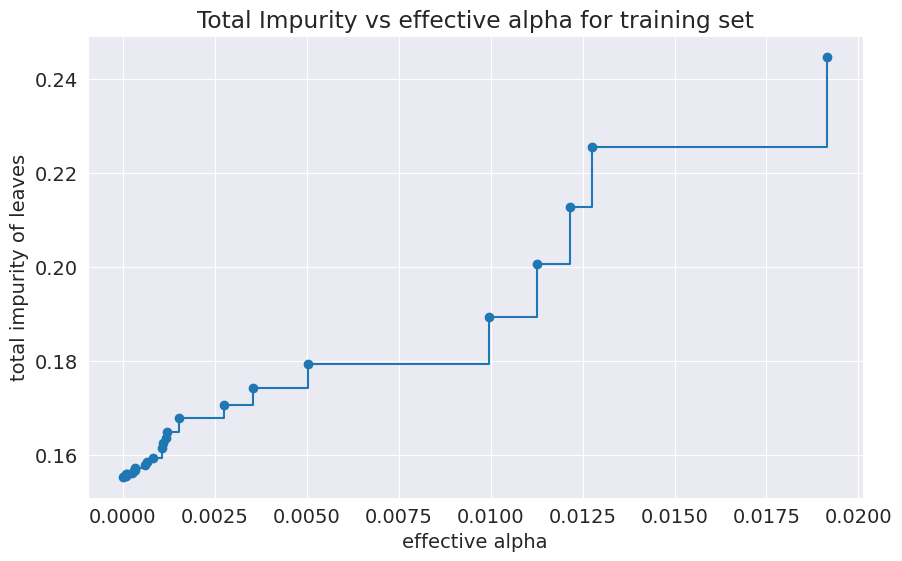

In [218]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

In [219]:
tree_pruns = []
for ccp_alpha in ccp_alphas[-10:]:
    tree_prun = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree_prun.fit(X_train, train_targets)
    tree_pruns.append(tree_prun)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        tree_pruns[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07952674593174541


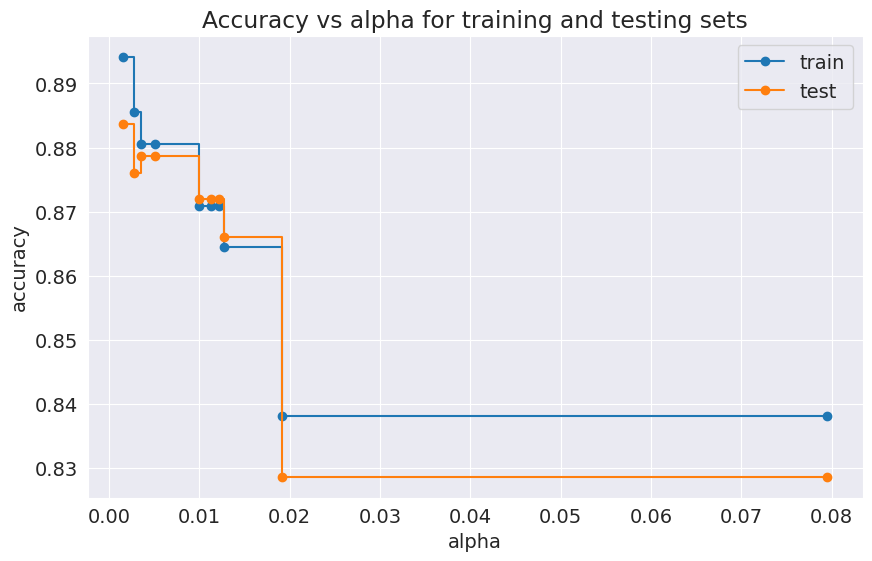

In [220]:
train_scores = [tree_prun.score(X_train, train_targets) for tree_prun in tree_pruns]
val_scores = [tree_prun.score(X_val, val_targets) for tree_prun in tree_pruns]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[-10:], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[-10:], val_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [237]:
tree_prun = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[-18])
tree_prun.fit(X_train, train_targets)

DecisionTreeClassifier(ccp_alpha=0.00033508830396877104, random_state=42)

In [239]:
tree_prun.tree_.max_depth

8

In [240]:
# –ø–æ—à—É–∫ leaf nodes –∑ –º–æ–¥–µ–ª—ñ models_5_1
leaf_nodes = tree_prun.tree_.n_leaves
print(f'Number of leaf nodes: {leaf_nodes}')

Number of leaf nodes: 41


In [238]:
count_auroc(tree_prun, X_train, X_val, train_targets, val_targets)

Train AUC: 0.9293
Validation AUC: 0.9241


(0.92927694858015, 0.9240733246450374)

###–ó–≤–µ–¥–µ–Ω–Ω—è –º–µ—Ç—Ä–∏–∫ –ø–æ –º–æ–¥–µ–ª—è—Ö

In [241]:
# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è —Å–ø–∏—Å–∫—É —Å–ª–æ–≤–Ω–∏–∫—ñ–≤
data_1 = [
    {'Model': dt_best, 'Coment': '–∑–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞–¥–∞–Ω–∏–º–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ', 'Max_depth': 5, 'Max_leaf_nodes': 9 },
    {'Model': model_5_1, 'Coment': '–º–æ–¥–µ–ª—å  –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ HW', 'Max_depth': 5, 'Max_leaf_nodes': 31 },
    {'Model': dt_best_1, 'Coment': "–∞–≤—Ç–æ–ø–æ—à—É–∫ –æ–±–æ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –ø—Ä–∏ —Ä–æ–∑—à–∏—Ä–µ–Ω—ñ –¥—ñ–∞–ø–∞–∑–æ–Ω—É 'max_leaf_nodes': np.arange(2, 31, 1)", 'Max_depth': 5, 'Max_leaf_nodes': 23 },
    {'Model': model_5, 'Coment': '–º–æ–¥–µ–ª—å –∑–∞ –≤—Ä—É—á–Ω—É –ø—ñ–¥—ñ–±—Ä–∞–Ω–∏–º–∏ –æ–±–æ–º–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏', 'Max_depth': 5, 'Max_leaf_nodes': 26},
    {'Model': knn, 'Coment': ' kNN –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º', 'Max_depth': 0, 'Max_leaf_nodes': 0},
    {'Model': knn_best, 'Coment': 'kNN –∑ n_neighbors=7 ', 'Max_depth': 0, 'Max_leaf_nodes':0},
    {'Model': tree_prun, 'Coment': '–¥–µ—Ä–µ–≤–æ —Ä—ñ—à–µ–Ω—å –∑ prunning ', 'Max_depth': 8, 'Max_leaf_nodes':41}
]

# –°—Ç–≤–æ—Ä–µ–Ω–Ω—è DataFrame
df_1 = pd.DataFrame(data_1)

In [242]:
#—Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –¥–ª—è —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–≥–æ –Ω–∞–±–æ—Ä—É AUROC
df_1['AUROC_train'] = df_1['Model'].apply(lambda model: train_auc(model, X_train, X_val, train_targets, val_targets))

In [243]:
#—Ä–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ –¥–ª—è –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–≥–æ –Ω–∞–±–æ—Ä—É AUROC
df_1['AUROC_val'] = df_1['Model'].apply(lambda model: val_auc(model, X_train, X_val, train_targets, val_targets))

In [244]:
df_1.head(7)

Model  \
0  DecisionTreeClassifier(max_depth=5, max_leaf_n...   
1  DecisionTreeClassifier(max_depth=5, random_sta...   
2  DecisionTreeClassifier(max_depth=5, max_leaf_n...   
3  DecisionTreeClassifier(max_depth=5, max_leaf_n...   
4                             KNeighborsClassifier()   
5                KNeighborsClassifier(n_neighbors=7)   
6  DecisionTreeClassifier(ccp_alpha=0.00033508830...   

                                              Coment  Max_depth  \
0                 –∑–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞–¥–∞–Ω–∏–º–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ          5   
1                          –º–æ–¥–µ–ª—å  –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ HW          5   
2  –∞–≤—Ç–æ–ø–æ—à—É–∫ –æ–±–æ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –ø—Ä–∏ —Ä–æ–∑—à–∏—Ä–µ–Ω—ñ –¥—ñ–∞–ø–∞–∑...          5   
3     –º–æ–¥–µ–ª—å –∑–∞ –≤—Ä—É—á–Ω—É –ø—ñ–¥—ñ–±—Ä–∞–Ω–∏–º–∏ –æ–±–æ–º–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏          5   
4                   kNN –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º          0   
5                               kNN –∑ n_neighbors=7           0   
6                          –¥–µ—Ä–µ–≤–æ —Ä—ñ—à–µ–Ω—å –∑ prunning           8   

   Max_leaf_nodes  AUROC_train  AUROC_val  
0               9     0.900323   0.895097  
1              31     0.924593   0.922418  
2              23     0.921718   0.919586  
3              26     0.924364   0.922168  
4               0     0.954510   0.866178  
5               0     0.945945   0.880327  
6              41     0.929277   0.924073

###Submission

In [253]:
#–∑–∞–≤–∞–Ω—Ç–∞–∂–µ–Ω–Ω—è —Ç–µ—Å—Ç–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö
test_raw_df = pd.read_csv('//content/drive/MyDrive/Python/ML/DATA/Kaggle/Bank/test.csv')

In [254]:
#–ø–æ–ø–µ—Ä–µ–¥–Ω—è –æ–±—Ä–æ–±–∫–∞ —Ç–µ—Å—Ç–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö
X_test = preprocess_new_data(test_raw_df, scaler, encoder, numeric_cols, categorical_cols, encoded_cols, model_cols)

In [255]:
#–ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö
test_raw_df['Exited'] = dt_best.predict_proba(X_test)[:,1]

In [256]:
ss = pd.read_csv('/content/drive/MyDrive/Python/ML/DATA/Kaggle/Bank/sample_submission.csv')

In [257]:
ss['Exited'] = ss['id'].map(test_raw_df.set_index('id')['Exited'])

In [259]:
ss.to_csv('/content/drive/MyDrive/Python/ML/DATA/Kaggle/Bank/submission_tree_best.csv', index=False)

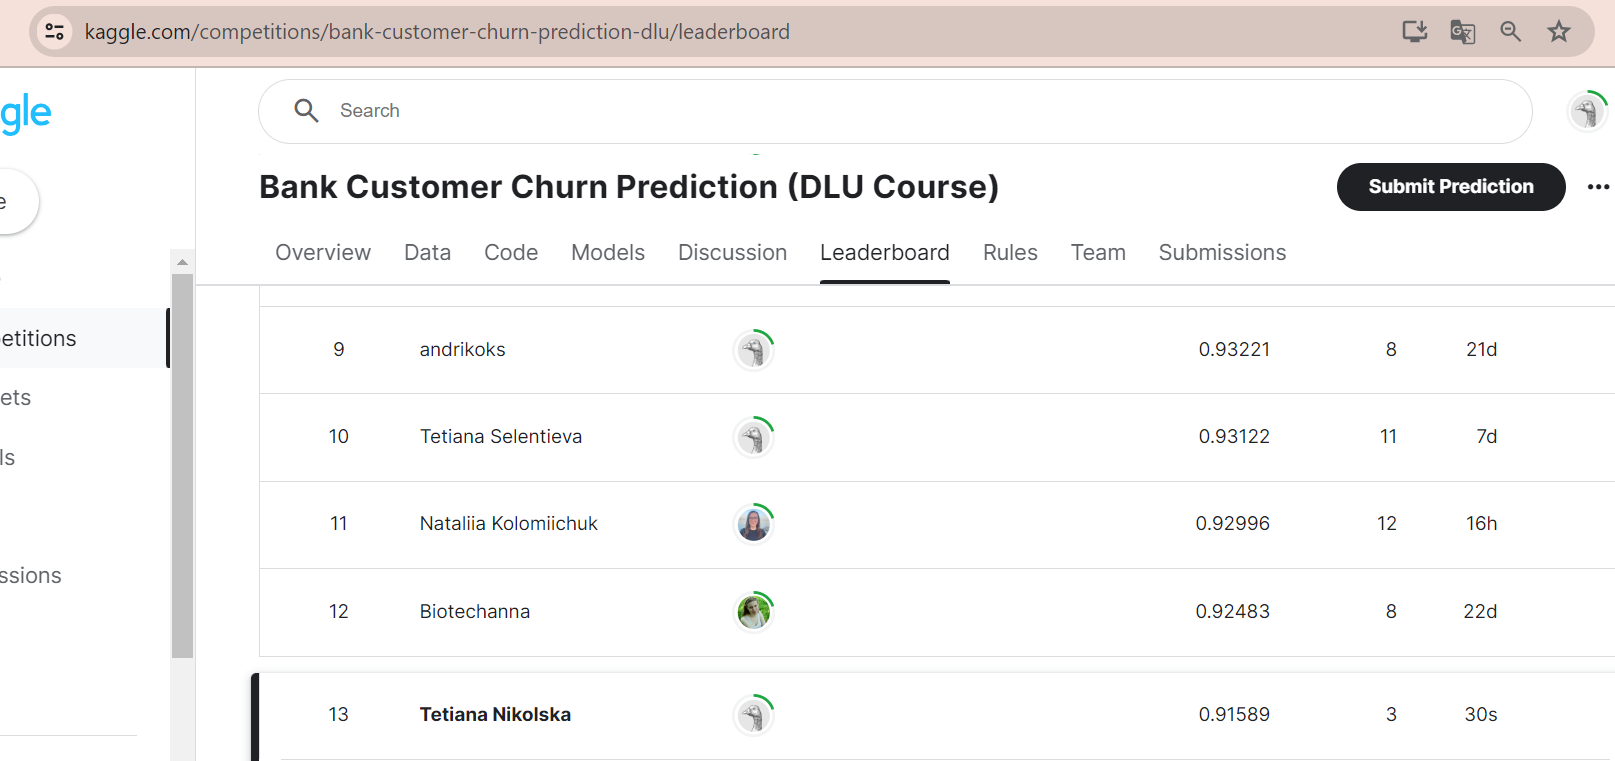

**–í–∏—Å–Ω–æ–≤–∫–∏:**
–ù–∞–π–∫—Ä–∞—â–∏–π —Å–∫–æ—Ä –ø–æ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä—É —É –º–æ–¥–µ–ª—ñ DecisionTreeClassifier(ccp_alpha=0.00033508830...)